setting up the framework to develop and backtest algorithms

## Basic strategies to implement

### Simple moving averages (SMA)
when the moving average over a longer period of time crosses the moving average over a shorter period of time, that's our indicator.

### momentum
recent performance been up in the last say 4 days then it'll probably be up today also

### mean reversion
if sotck is above/below the mean it'll probably revert and approach the mean/moving average


# Vectorized Implementation
we will make some predetermined simplifications so that i have more focus on the practice of vectorization

### simple trading strategies
vectorized backtesting has limitations when it comes to backtesting, however, simple strategies can be tested well

### interactive strategy exploration
this vectorized backtesting allows for us to quickly explore trading strategies and their characteristics, parameters can then also be swapped out

### visualization as a goal
this approach lends itself well to being able to create visualizations of the data we are working with

### also it's fast!

## notes about vectorization
also called array programming. pretty much everything is moved into the vector space, instead of doing operations on scalars we do operations on a vector at a time

we will be using numpy for quick inference. the basic `ndarray` stands for *n-dimensional array*. linear algebra techs then works as expected.

In [83]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])

2 * a

array([ 2,  4,  6,  8, 10])

In [84]:
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [85]:
# we can also create an array and then transform it to a matrix representation
a = np.arange(12).reshape(3, 4)
2 * a

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [86]:
a.mean(), np.mean(a)

(5.5, 5.5)

pandas equivalent

In [87]:
import pandas as pd

cols = ['a', 'b', 'c']
data = np.arange(15).reshape(5, 3)


rows = pd.date_range('2021-07-01', periods=5, freq='B') # generates 5 business days
rows

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [88]:
df = pd.DataFrame(data, columns=cols, index=rows)
df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


vectorization works pretty much the same as `numpy`, however, aggregation happens column-wise

In [89]:
2 * df # multiply all elements by 2

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [90]:
df.sum(), df.mean()

(a    30
 b    35
 c    40
 dtype: int64,
 a    6.0
 b    7.0
 c    8.0
 dtype: float64)

so each column can then be treated as a vector. we can access columns by `["col_name"]` notation or `df.col_name`

In [91]:
df["a"] + df["b"] # add column a to column b

2021-07-01     1
2021-07-02     7
2021-07-05    13
2021-07-06    19
2021-07-07    25
Freq: B, dtype: int64

In [92]:
0.5 * df.a + 2 * df.b - df.c

2021-07-01     0.0
2021-07-02     4.5
2021-07-05     9.0
2021-07-06    13.5
2021-07-07    18.0
Freq: B, dtype: float64

we can also get the result of boolean operations then use logical indexing

In [93]:
df[df['a'] > 5] # select rows where column a is greater than 5

,a,b,c
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [94]:
# or similarly a comparison between two columns
0.15 * df.a + df.b > df.c

2021-07-01    False
2021-07-02    False
2021-07-05    False
2021-07-06     True
2021-07-07     True
Freq: B, dtype: bool

pretty much the advantage of this is we can use C-optimized for loops to iterate over these matrix maths instead of slower pythonic ones 

## SMA based strategy

we are going to be looking at the USD/EUR exchange rate

In [95]:
raw = pd.read_csv("data/aiif_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna()

raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [96]:
data = pd.DataFrame(raw["EUR="])
data.rename(columns={'EUR=': 'price'}, inplace=True)
data.head()

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [98]:
data["sma1"] = data["price"].rolling(42).mean()
data["sma2"] = data["price"].rolling(252).mean()
data

,price,sma1,sma2
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN
...,...,...,...
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428


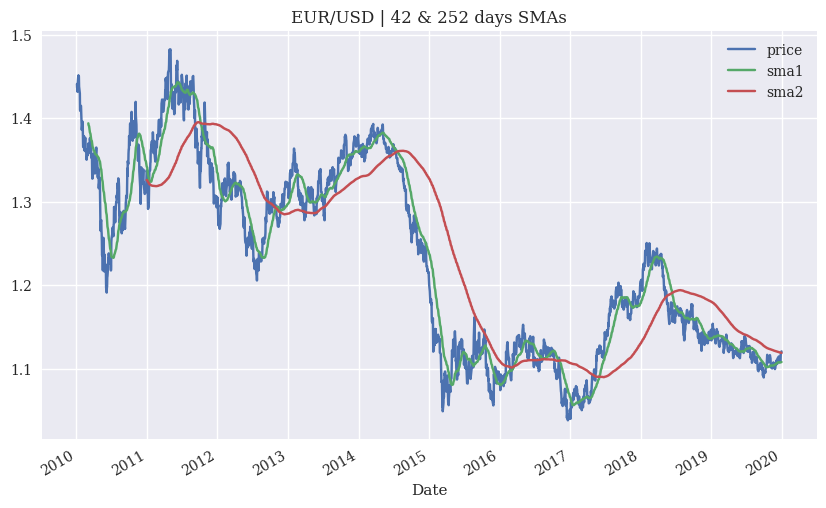

In [110]:
from pylab import mpl, plt
import seaborn as sns

# print(plt.style.available)
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["font.family"] = "serif"

data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6))
plt.show()

okay now that we have this nice graph, we want to generate signals whenever the green and red lines overlap:


we go long (expect positive) when small SMA is above longer SMA and short when small SMA below long SMA

we will indicate a long position by 1 and a short position by –1

In [114]:
data['position'] = np.where(data['sma1'] > data['sma2'], 1, -1)
data.dropna(inplace=True)
data

,price,sma1,sma2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


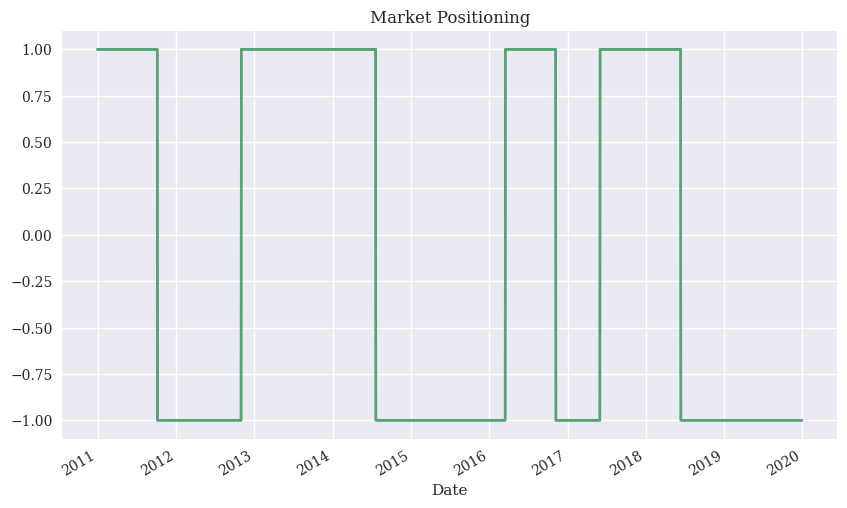

In [116]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6))
plt.show()

okay so lets calculate the performance of a strategy like this

In [ ]:
data['returns'] = np.log(data['price'] / data['price'].shift(1)) # log returns of (today / yesterday)
data

,price,sma1,sma2,position,returns
Date,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472
...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094


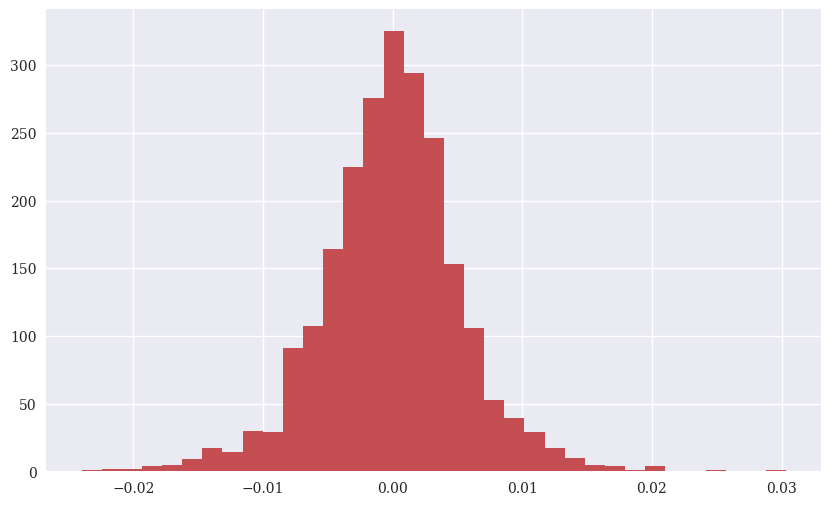

In [122]:
data['returns'].hist(bins=35, figsize=(10, 6))
plt.show()

In [127]:
data['strategy'] = data['position'].shift(1) * data['returns'] # strategy returns (yesterday's position * today's returns)
data[['returns', 'strategy']].sum().apply(np.exp) # calculate gross performance

returns     0.838006
strategy    1.288039
dtype: float64

so the log returns, passive investing is down to 83% something. our simple strategy is up to 129%

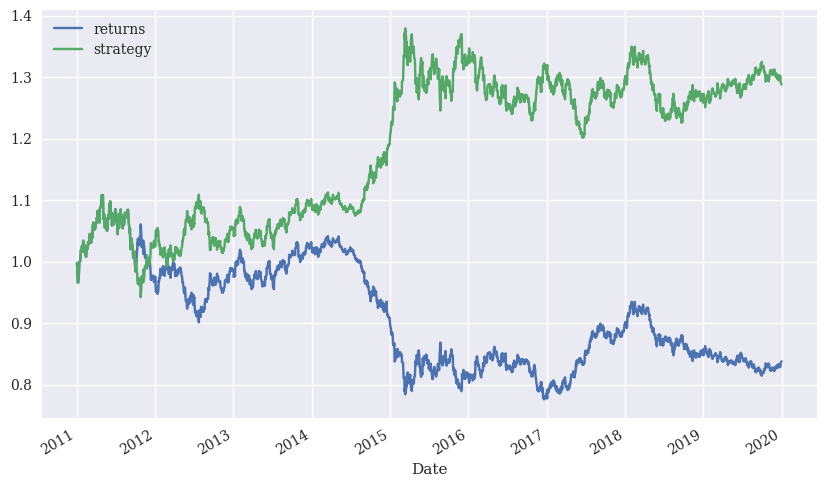

In [131]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6)) # cumulative returns
plt.show()

okay so let's adjust this for risk and calculate metrics and the Sharpe of this strategy

mean return

In [144]:
# 252 trading days in a year so this is an annualized return
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

std of returns

In [145]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

strategy    0.028575
dtype: float64

In [169]:
# Sharpe ratio calculation with 5% risk-free rate
risk_free_rate = 0.05
annualized_return = np.exp(data[['strategy']].mean() * 252) - 1
sharpe_ratio = (annualized_return - risk_free_rate) / (data[['strategy']].std() * 252 ** 0.5)
sharpe_ratio

strategy   -0.250866
dtype: float64

okay and then calculating the maximum drawdown is a little bit more work

we want to find *maximum drawdown* and *longest drawdown period*

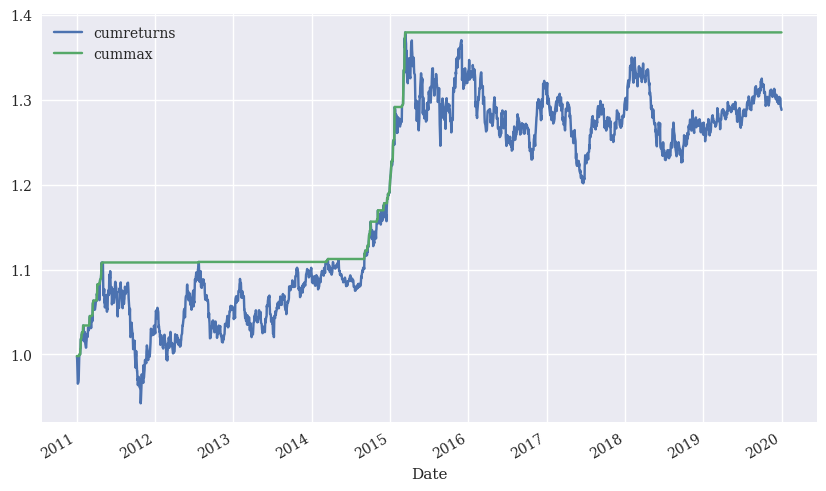

In [178]:
data["cumreturns"] = data["strategy"].cumsum().apply(np.exp)
data["cummax"] = data["cumreturns"].cummax()
drawdown = data["cummax"] - data["cumreturns"]
data[['cumreturns', 'cummax']].dropna().plot(figsize=(10, 6))
plt.show()

In [179]:
drawdown.max()

0.17779367070195895